In [12]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv('/content/Pre_processed_data(bondora).csv')

In [14]:
df.shape

(77394, 39)

In [15]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'LoanStatus'],
      dtype='object')

In [16]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,LoanStatus
0,0,0,115.0410,True,"Income unverified,cross-referenced by phone",Estonian,61,Female,EE,319.5582,115.0408,30.0,12,130.393314,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Not specified,10500.0,0,0.0,0,0.0,0.0,F,False,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NoDefault
1,0,0,140.6057,False,"Income unverified,cross-referenced by phone",Estonian,48,Female,EE,191.7349,140.6057,25.0,1,130.393314,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Not specified,10800.0,0,0.0,0,0.0,0.0,F,False,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NoDefault
2,0,0,319.5580,True,"Income unverified,cross-referenced by phone",Estonian,58,Female,EE,319.5582,319.5409,25.0,20,130.393314,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Not specified,7000.0,0,0.0,0,0.0,0.0,F,True,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0,0,57.5205,True,"Income unverified,cross-referenced by phone",Estonian,23,Female,EE,127.8233,57.5205,45.0,15,130.393314,Loan consolidation,Basic education,Single,Not present,UpTo2Years,Other,Not specified,11600.0,0,0.0,0,0.0,0.0,F,False,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NoDefault
4,0,0,319.5582,True,"Income unverified,cross-referenced by phone",Estonian,25,Female,EE,319.5582,319.5436,30.0,12,130.393314,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Not specified,6800.0,0,0.0,0,0.0,0.0,F,False,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


<AxesSubplot:xlabel='PreviousRepaymentsBeforeLoan'>

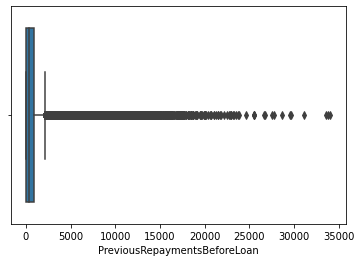

In [17]:
sns.boxplot(df.PreviousRepaymentsBeforeLoan)

In [18]:
df_IQR = df[df.select_dtypes([float, int]).columns].quantile(.75) - df[df.select_dtypes([float, int]).columns].quantile(.25)
df_IQR 

BidsPortfolioManager                      1383.000000
BidsApi                                      5.000000
BidsManual                                 726.000000
Age                                         18.000000
AppliedAmount                             2980.000000
Amount                                    2445.000000
Interest                                    26.910000
LoanDuration                                24.000000
MonthlyPayment                             119.037500
IncomeTotal                               1110.000000
ExistingLiabilities                          4.000000
LiabilitiesTotal                           622.960000
RefinanceLiabilities                         0.000000
DebtToIncome                                20.790000
FreeCash                                   269.007500
PrincipalPaymentsMade                     1389.602500
InterestAndPenaltyPaymentsMade             574.965000
PrincipalBalance                          2111.980000
InterestAndPenaltyBalance   

In [19]:
df_Max =  df[df.select_dtypes([float, int]).columns].quantile(.75) + (1.5*df_IQR)
df_Min =  df[df.select_dtypes([float, int]).columns].quantile(.25) - (1.5*df_IQR)
df_Max

BidsPortfolioManager                      3703.500000
BidsApi                                     12.500000
BidsManual                                1834.000000
Age                                         75.000000
AppliedAmount                             8190.000000
Amount                                    6852.500000
Interest                                    90.695000
LoanDuration                                96.000000
MonthlyPayment                             340.663750
IncomeTotal                               3665.000000
ExistingLiabilities                         11.000000
LiabilitiesTotal                          1670.440000
RefinanceLiabilities                         0.000000
DebtToIncome                                51.975000
FreeCash                                   672.518750
PrincipalPaymentsMade                     3535.696250
InterestAndPenaltyPaymentsMade            1474.862500
PrincipalBalance                          5279.950000
InterestAndPenaltyBalance   

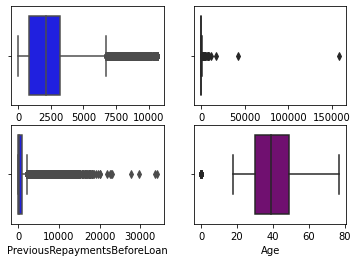

In [20]:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.boxplot(df.FreeCash[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');

In [21]:
df.select_dtypes([float, int]).columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [22]:
col_IQR = df['Age'].quantile(.75) - df['Age'].quantile(.25)
col_Max =  df['Age'].quantile(.75) + (1.5*col_IQR)
col_Max

75.0

In [23]:
for column in df.select_dtypes([float, int]).columns :
   
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Max =  df[column].quantile(.75) + (1.5*col_IQR)
    df[column][df[column] > col_Max] =  col_Max

In [24]:
for column in df.select_dtypes([float, int]).columns :
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Min =  df[column].quantile(.25) - (1.5*col_IQR)
    df[column][df[column] < col_Min] =  col_Min

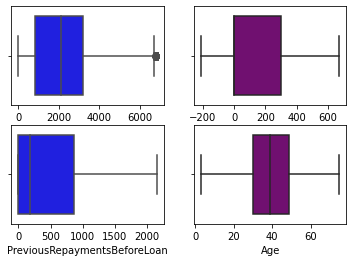

In [25]:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[1,0], color='blue');

sns.boxplot(df.FreeCash[df.LoanStatus=='Default'], ax=axs[0,1], color='purple')
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,1], color='purple');

In [26]:

y = df.LoanStatus
x = df.drop(columns = ['LoanStatus'])

In [27]:
x

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0.0,0.0,115.0410,True,"Income unverified,cross-referenced by phone",Estonian,61,Female,EE,319.5582,115.0408,30.00,12,130.393314,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,115.0408,20.4222,0.00,0.0000,1.0,83.0852,0.0000,0
1,0.0,0.0,140.6057,False,"Income unverified,cross-referenced by phone",Estonian,48,Female,EE,191.7349,140.6057,25.00,1,130.393314,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,140.6057,2.0227,0.00,0.0000,2.0,255.6467,258.6256,0
2,0.0,0.0,319.5580,True,"Income unverified,cross-referenced by phone",Estonian,58,Female,EE,319.5582,319.5409,25.00,20,130.393314,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,True,M,203.1909,59.7626,116.35,414.0700,0.0,0.0000,0.0000,0
3,0.0,0.0,57.5205,True,"Income unverified,cross-referenced by phone",Estonian,23,Female,EE,127.8233,57.5205,45.00,15,130.393314,Loan consolidation,Basic education,Single,Not present,UpTo2Years,Other,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,57.5205,18.7323,0.00,0.0000,1.0,134.2144,0.0000,0
4,0.0,0.0,319.5582,True,"Income unverified,cross-referenced by phone",Estonian,25,Female,EE,319.5582,319.5436,30.00,12,130.393314,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Not specified,3665.0,0,0.00,0,0.00,0.00000,F,False,M,319.5436,220.4200,0.00,0.0000,1.0,146.9966,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515.0,0.0,485.0000,True,Income verified,Finnish,37,Male,FI,3000.0000,3000.0000,31.01,60,107.680000,Loan consolidation,Vocational education,Single,Fully employed,MoreThan5Years,Other,Council house,1400.0,1,500.00,0,7.69,672.51875,E,False,M,2308.1900,0.0000,0.00,0.0000,0.0,0.0000,0.0000,0
77390,1880.0,0.0,1120.0000,False,Income verified,Finnish,35,Male,FI,3000.0000,3000.0000,18.25,60,85.330000,Home improvement,Vocational education,Single,Fully employed,MoreThan5Years,Transport and warehousing,Owner,2265.0,5,1670.44,0,31.58,520.67000,B,False,M,3000.0000,1474.8625,0.00,0.0000,1.0,3000.0000,389.3600,0
77391,1975.0,0.0,525.0000,True,Income unverified,Finnish,40,Male,FI,2500.0000,2500.0000,24.83,60,80.420000,Loan consolidation,Vocational education,Married,Entrepreneur,MoreThan5Years,Construction,Owner,2500.0,2,1350.00,0,3.22,672.51875,D,False,M,1869.7600,199.3300,630.24,1227.9800,0.0,0.0000,0.0000,0
77392,1840.0,0.0,1160.0000,False,Income and expenses verified,Estonian,47,Female,EE,3000.0000,3000.0000,17.74,60,84.510000,Other,Higher education,Married,Fully employed,MoreThan5Years,Healthcare and social help,"Tenant,pre-furnished property",540.0,8,732.05,0,44.35,50.49000,B,True,M,2257.5400,561.5300,0.00,0.0000,1.0,500.0000,96.8000,0


In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [29]:
y = LE.fit_transform(y)

In [30]:
for feature in x.select_dtypes([object, bool]).columns:
    x[feature]= LE.fit_transform(x[feature])

In [31]:
x

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0.0,0.0,115.0410,1,2,1,61,0,0,319.5582,115.0408,30.00,12,130.393314,10,5,2,1,6,17,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,115.0408,20.4222,0.00,0.0000,1.0,83.0852,0.0000,0
1,0.0,0.0,140.6057,0,2,1,48,0,0,191.7349,140.6057,25.00,1,130.393314,10,1,1,1,0,5,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,140.6057,2.0227,0.00,0.0000,2.0,255.6467,258.6256,0
2,0.0,0.0,319.5580,1,2,1,58,0,0,319.5582,319.5409,25.00,20,130.393314,7,4,2,1,7,9,6,3665.0,0,0.00,0,0.00,0.00000,6,1,0,203.1909,59.7626,116.35,414.0700,0.0,0.0000,0.0000,0
3,0.0,0.0,57.5205,1,2,1,23,0,0,127.8233,57.5205,45.00,15,130.393314,8,0,4,2,5,13,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,57.5205,18.7323,0.00,0.0000,1.0,134.2144,0.0000,0
4,0.0,0.0,319.5582,1,2,1,25,0,0,319.5582,319.5436,30.00,12,130.393314,15,4,0,1,5,17,6,3665.0,0,0.00,0,0.00,0.00000,6,0,0,319.5436,220.4200,0.00,0.0000,1.0,146.9966,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515.0,0.0,485.0000,1,3,2,37,1,2,3000.0000,3000.0000,31.01,60,107.680000,8,5,4,1,0,13,0,1400.0,1,500.00,0,7.69,672.51875,5,0,0,2308.1900,0.0000,0.00,0.0000,0.0,0.0000,0.0000,0
77390,1880.0,0.0,1120.0000,0,3,2,35,1,2,3000.0000,3000.0000,18.25,60,85.330000,7,5,4,1,0,18,8,2265.0,5,1670.44,0,31.58,520.67000,2,0,0,3000.0000,1474.8625,0.00,0.0000,1.0,3000.0000,389.3600,0
77391,1975.0,0.0,525.0000,1,1,2,40,1,2,2500.0000,2500.0000,24.83,60,80.420000,8,5,2,0,0,4,8,2500.0,2,1350.00,0,3.22,672.51875,4,0,0,1869.7600,199.3300,630.24,1227.9800,0.0,0.0000,0.0000,0
77392,1840.0,0.0,1160.0000,0,0,1,47,0,0,3000.0000,3000.0000,17.74,60,84.510000,10,1,2,1,0,8,10,540.0,8,732.05,0,44.35,50.49000,2,1,0,2257.5400,561.5300,0.00,0.0000,1.0,500.0000,96.8000,0


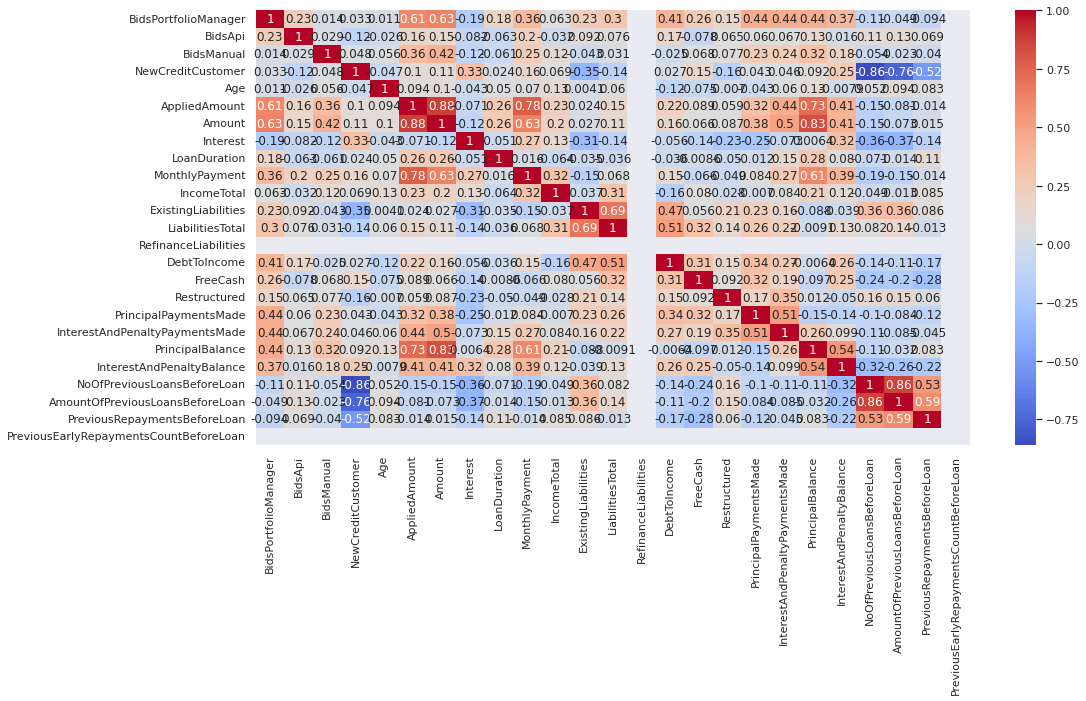

In [33]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df[df.LoanStatus == 'Default'].corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

In [34]:
def Correlation(dataset, threshold): 
    correltated_features = set() # as a container of highly correlated features
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correltated_features.add(column_name)
    return correltated_features

In [35]:
Correlation(x, 0.8)

{'Amount', 'AmountOfPreviousLoansBeforeLoan', 'NoOfPreviousLoansBeforeLoan'}

In [36]:
x.drop(columns= ['Amount', 'AmountOfPreviousLoansBeforeLoan', 'NoOfPreviousLoansBeforeLoan'], inplace = True )


In [37]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, mutual_info_classif, f_classif


In [38]:
features = SelectKBest(mutual_info_classif, k=15)
# Selected features
Selected_features =   features.fit_transform(x, y)

In [39]:
x.columns[features.get_support()]

Index(['BidsPortfolioManager', 'LanguageCode', 'Country', 'AppliedAmount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance'],
      dtype='object')

In [40]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [42]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [44]:
Standard_Scalar = StandardScaler()

In [45]:
Selected_features = Standard_Scalar.fit_transform(Selected_features)


In [46]:
Selected_features


array([[-0.98790672, -0.78211045, -0.88269278, ..., -0.80568491,
        -0.79905024, -0.68715899],
       [-0.98790672, -0.78211045, -0.88269278, ..., -0.84437053,
        -0.79905024, -0.68715899],
       [-0.98790672, -0.78211045, -0.88269278, ..., -0.7229703 ,
        -0.72540153, -0.26207894],
       ...,
       [ 0.80074606, -0.36690548,  1.442414  , ..., -0.42952481,
        -0.40011288,  0.57347279],
       [ 0.67848372, -0.78211045, -0.88269278, ...,  0.33201377,
        -0.79905024, -0.68715899],
       [ 1.71997775, -0.78211045, -0.88269278, ...,  0.58785037,
         0.16695368,  2.09486096]])

In [47]:
from sklearn.decomposition import PCA


In [48]:
pca = PCA(n_components = 2) 


In [49]:
Selected_features_pca =  pca.fit_transform(Selected_features)


In [50]:
Selected_features_pca.shape


(77394, 2)

In [51]:
Selected_features_pca.shape


(77394, 2)

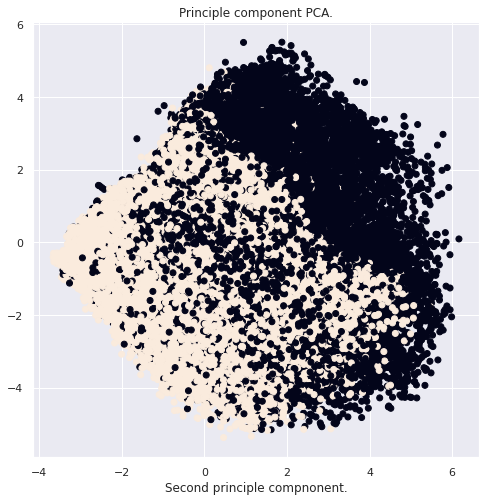

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(Selected_features_pca[:,0], Selected_features_pca[:,1], c = y)
plt.title('Principle component PCA.')
plt.xlabel("First principle compnonent.")
plt.xlabel("Second principle compnonent.")
plt.show()

In [53]:
pca.explained_variance_ratio_

array([0.24649784, 0.20090911])

In [53]:
sum(pca.explained_variance_ratio_) * 100

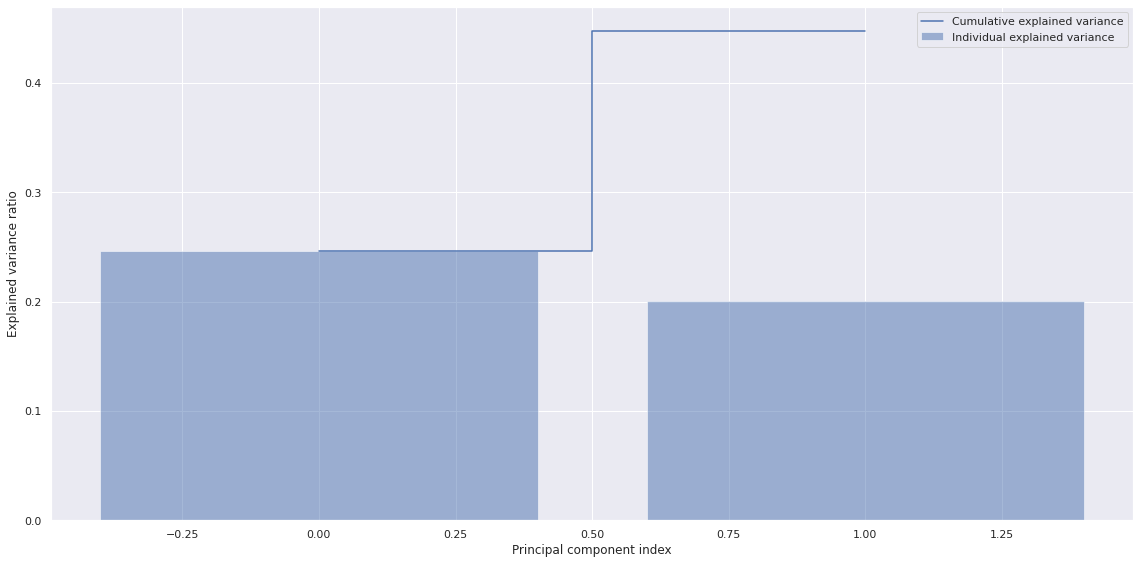

In [54]:
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [55]:
# Create a PCA object
pca2 = PCA(n_components = 15)

In [56]:
Selected_features_pca =  pca2.fit_transform(Selected_features)


In [57]:
sum(pca2.explained_variance_ratio_) * 100


100.00000000000003

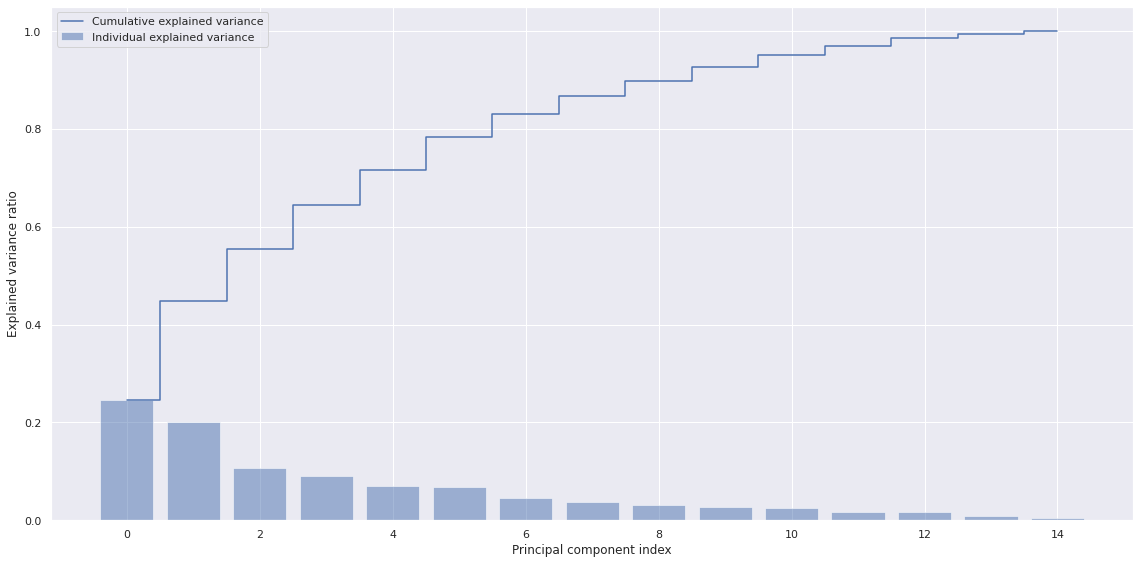

In [58]:
exp_var_pca = pca2.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()